In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
import datetime
from netCDF4 import Dataset


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
import cartopy.crs as ccrs
import cartopy

import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from orographicPrecipitation.precip_model_functions import qsat,upslope_omega_sin
from orographicPrecipitation.precip_extremes_scaling import *
from wrfProcessing import *

import warnings
from tabulate import tabulate

# Data

In [3]:
def sel_crosseqtropicmountain(ds):
    return ds.sel(west_east=slice(38,40),south_north=slice(64,75))
with warnings.catch_warnings():
    warnings.simplefilter("ignore",FutureWarning)
    
    Mcont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","new.wrf.crosseq.mountain.100km.300d"  ,"Mountain, control"  ,sel_crosseqtropicmountain,'gold',open_ds=1      ,shifttimes=0)
    Acont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","new.wrf.crosseq.aquaplanet.100km.300d","Aquaplanet, control",sel_crosseqtropicmountain,'dodgerblue',open_ds=1,shifttimes=0)
    

loading time : 16.7 s
Daily precips already computed
precips time : 0.2 s
loading time : 16.7 s
Daily precips already computed
precips time : 0.2 s


In [6]:
%%time
McontU_allt_alllevs = Mcont.vars.u_gr_p.sel(south_north=slice(64,75)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
McontV_allt_alllevs = Mcont.vars.v_gr_p.sel(south_north=slice(64,75)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
AcontU_allt_alllevs = Acont.vars.u_gr_p.sel(south_north=slice(64,75)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
AcontV_allt_alllevs = Acont.vars.v_gr_p.sel(south_north=slice(64,75)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()

McontU_allt_alllevs.to_netcdf(os.path.join(Mcont.path,Mcont.simulation_name,'diags',Mcont.simulation_name+'.u_gr_p_tropicalmean.nc'))
McontV_allt_alllevs.to_netcdf(os.path.join(Mcont.path,Mcont.simulation_name,'diags',Mcont.simulation_name+'.v_gr_p_tropicalmean.nc'))
AcontU_allt_alllevs.to_netcdf(os.path.join(Acont.path,Mcont.simulation_name,'diags',Mcont.simulation_name+'.u_gr_p_tropicalmean.nc'))
AcontV_allt_alllevs.to_netcdf(os.path.join(Acont.path,Mcont.simulation_name,'diags',Mcont.simulation_name+'.v_gr_p_tropicalmean.nc'))

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 8.16 s, sys: 26.1 s, total: 34.3 s
Wall time: 30.9 s


In [7]:
%%time
McontW_allt_alllevs = Mcont.vars.w_p.sel(south_north=slice(64,75)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
AcontW_allt_alllevs = Acont.vars.w_p.sel(south_north=slice(64,75)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()

McontW_allt_alllevs.to_netcdf(os.path.join(Mcont.path,Mcont.simulation_name,'diags',Mcont.simulation_name+'.w_p_tropicalmean.nc'))
AcontW_allt_alllevs.to_netcdf(os.path.join(Acont.path,Mcont.simulation_name,'diags',Mcont.simulation_name+'.w_p_tropicalmean.nc'))




/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 3.96 s, sys: 11.3 s, total: 15.3 s
Wall time: 10.4 s


In [13]:
McontU_alllevs = McontU_allt_alllevs.mean("time")
McontV_alllevs = McontV_allt_alllevs.mean("time")
McontW_alllevs = McontW_allt_alllevs.mean("time")
AcontU_alllevs = AcontU_allt_alllevs.mean("time")
AcontV_alllevs = AcontV_allt_alllevs.mean("time")
AcontW_alllevs = AcontW_allt_alllevs.mean("time")
McontU = McontU_alllevs.sel(level=850.)
McontV = McontV_alllevs.sel(level=850.)
McontW = McontW_alllevs.sel(level=850.)
AcontU = AcontU_alllevs.sel(level=850.)
AcontV = AcontV_alllevs.sel(level=850.)
AcontW = AcontW_alllevs.sel(level=850.)

In [14]:
McontU_std = McontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontV_std = McontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontW_std = McontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontU_std = AcontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontV_std = AcontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontW_std = AcontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')


# Longitude plots

## Mean

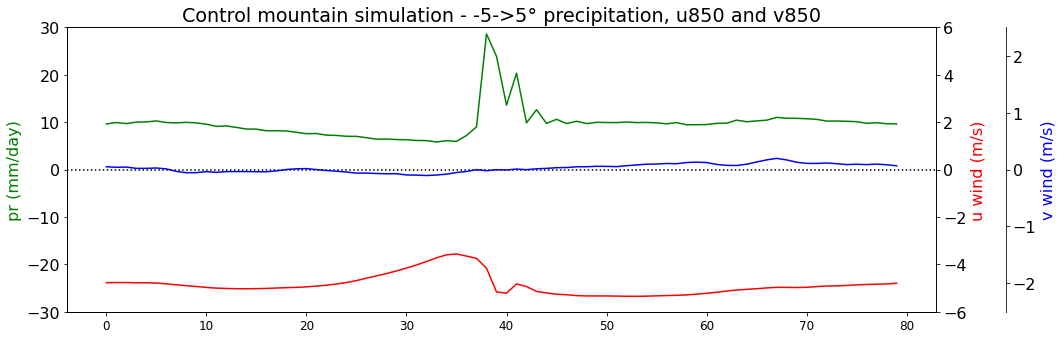

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain simulation - -5->5° precipitation, u850 and v850')

ax.plot(Mcont.precip_daily.west_east,Mcont.precip_daily.sel(south_north=slice(64,75)).mean(["time","south_north"]),'g',label='pr')
ax.set_ylabel('pr (mm/day)',color="g")
ax.set_ylim(-30.,30.)
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax.twinx()
ax2.plot(McontU.west_east,McontU,'r')
ax2.set_ylabel('u wind (m/s)', color='r') #;ax2.set_ylim(25,30)
ax2.set_ylim(-6.,6.)
    
ax3=ax.twinx()
ax3.plot(McontV.west_east,McontV,'b')
ax3.spines["right"].set_position(("axes", 1.08))
ax3.set_ylabel('v wind (m/s)', color='b')
ax3.set_ylim(-2.5,2.5)

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

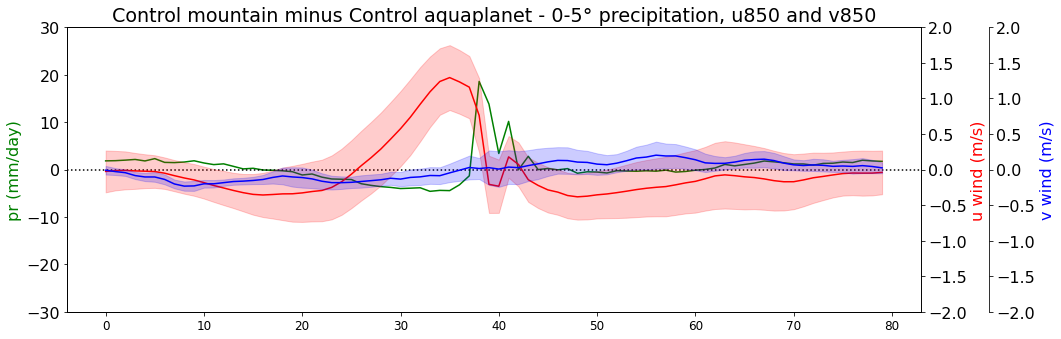

In [19]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° precipitation, u850 and v850')

ax.plot(Mcont.precip_daily.west_east,(Mcont.precip_daily-Acont.precip_daily).sel(south_north=slice(64,75)).mean(["time","south_north"]),'g',label='pr')
ax.set_ylabel('pr (mm/day)',color="g")
ax.set_ylim(-30.,30.)
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax.twinx()
ax2.plot(McontU.west_east,McontU-AcontU,'r')
ax2.fill_between(McontU.west_east, McontU-AcontU-McontU_std, McontU-AcontU+McontU_std,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax2.set_ylabel('u wind (m/s)', color='r')
ax2.set_ylim(-2,2)
    
ax3=ax.twinx()
ax3.plot(McontV.west_east,McontV-AcontV,'b')
ax3.fill_between(McontV.west_east, McontV-AcontV-McontV_std, McontV-AcontV+McontV_std,
                 facecolor="b",
                 color='b',   
                 alpha=0.2)  
ax3.spines["right"].set_position(("axes", 1.08))
ax3.set_ylabel('v wind (m/s)', color='b')
ax3.set_ylim(-2,2)

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

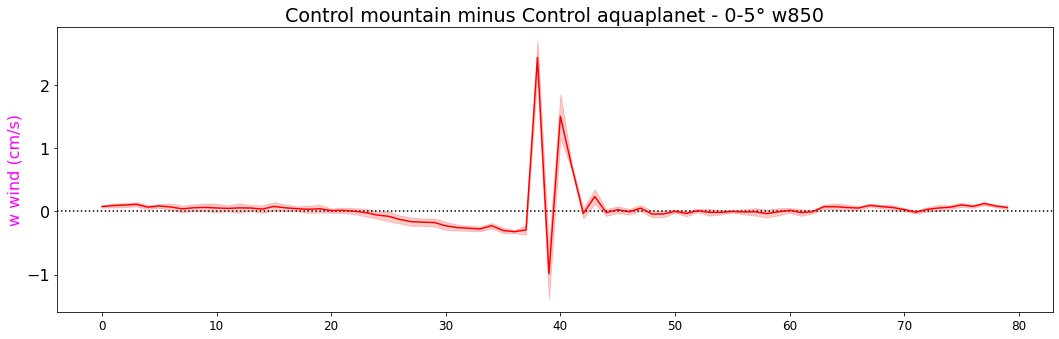

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° w850')

ax.axhline(0.,linestyle=':',color='k')
ax.plot(McontW.west_east,(McontW-AcontW)*100,'r')
ax.fill_between(McontW.west_east, (McontW-AcontW-McontW_std)*100, (McontW-AcontW+McontW_std)*100,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax.set_ylabel('w wind (cm/s)', color='magenta')
#ax.set_ylim(-4.5,4.5)
    
matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

## Seasonal

In [99]:
McontUs = [McontU_allt.isel(time=range(max(i,0),min(i+364,3800))).mean('time') for i in range(-30,3800,364)]
AcontUs = [AcontU_allt.isel(time=range(max(i,0),min(i+364,3790))).mean('time') for i in range(-30,3800,364)]
McontVs = [McontV_allt.isel(time=range(max(i,0),min(i+364,3800))).mean('time') for i in range(-30,3800,364)]
AcontVs = [AcontV_allt.isel(time=range(max(i,0),min(i+364,3790))).mean('time') for i in range(-30,3800,364)]

lbls=["DJF year 1",
      "MAM year 1",
      "JJA year 1",
      "SON year 1",
      "DJF year 2",
      "MAM year 2",
      "JJA year 2",
      "SON year 2",
      "DJF year 3",
      "MAM year 3",
      "JJA year 3",
     ]

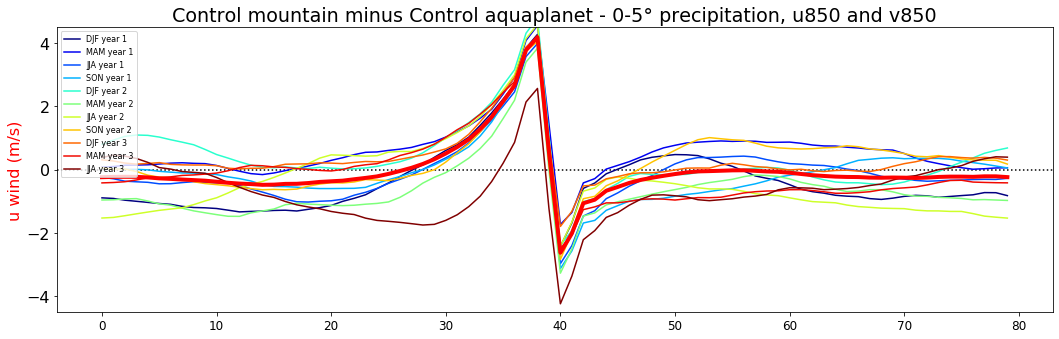

In [98]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° v850')
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax

ax2.set_ylabel('u wind (m/s)', color='r')
ax2.set_ylim(-4.5,4.5)
clrs=plt.cm.jet(np.linspace(0,1,11))
for i,(a,m) in enumerate(zip(AcontUs,McontUs)):
    ax2.plot(McontU.west_east,m-a,color = clrs[i],label = lbls[i]) 
ax2.plot(McontU.west_east,McontU-AcontU,'r',linewidth=4)     

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
ax2.legend(fontsize=8)

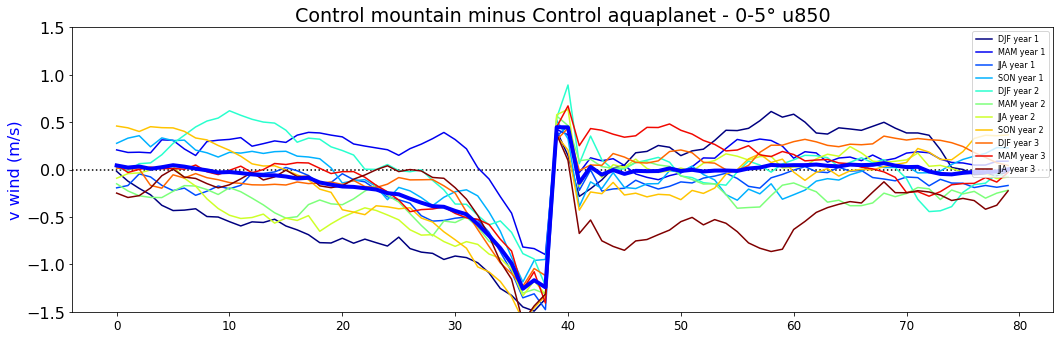

In [103]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° u850')
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax

ax2.set_ylabel('v wind (m/s)', color='b')
ax2.set_ylim(-1.5,1.5)
clrs=plt.cm.jet(np.linspace(0,1,11))
for i,(a,m) in enumerate(zip(AcontVs,McontVs)):
    ax2.plot(McontV.west_east,m-a,color = clrs[i],label = lbls[i]) 
ax2.plot(McontV.west_east,McontV-AcontV,'b',linewidth=4)     

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
ax2.legend(fontsize=8)

# 2D longitude/pressure plots

In [ ]:
def plot_2dvar(var,ax):
    c = ax.pcolormesh(np.array(var),cmap=plt.cm.RdBu_r,vmin=-scale,vmax=scale)
    plt.colorbar(c,ax=ax)
    mtn.plot.contour(ax=ax,**{'levels':[200.]})

In [21]:
def plot_lon_lev(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax, x='west_east',yincrease=False)
    else :
        (Mcont-Acont).plot(ax=ax, x='west_east',yincrease=False,levels=lvls)
    ax.set_title(lbl)
   

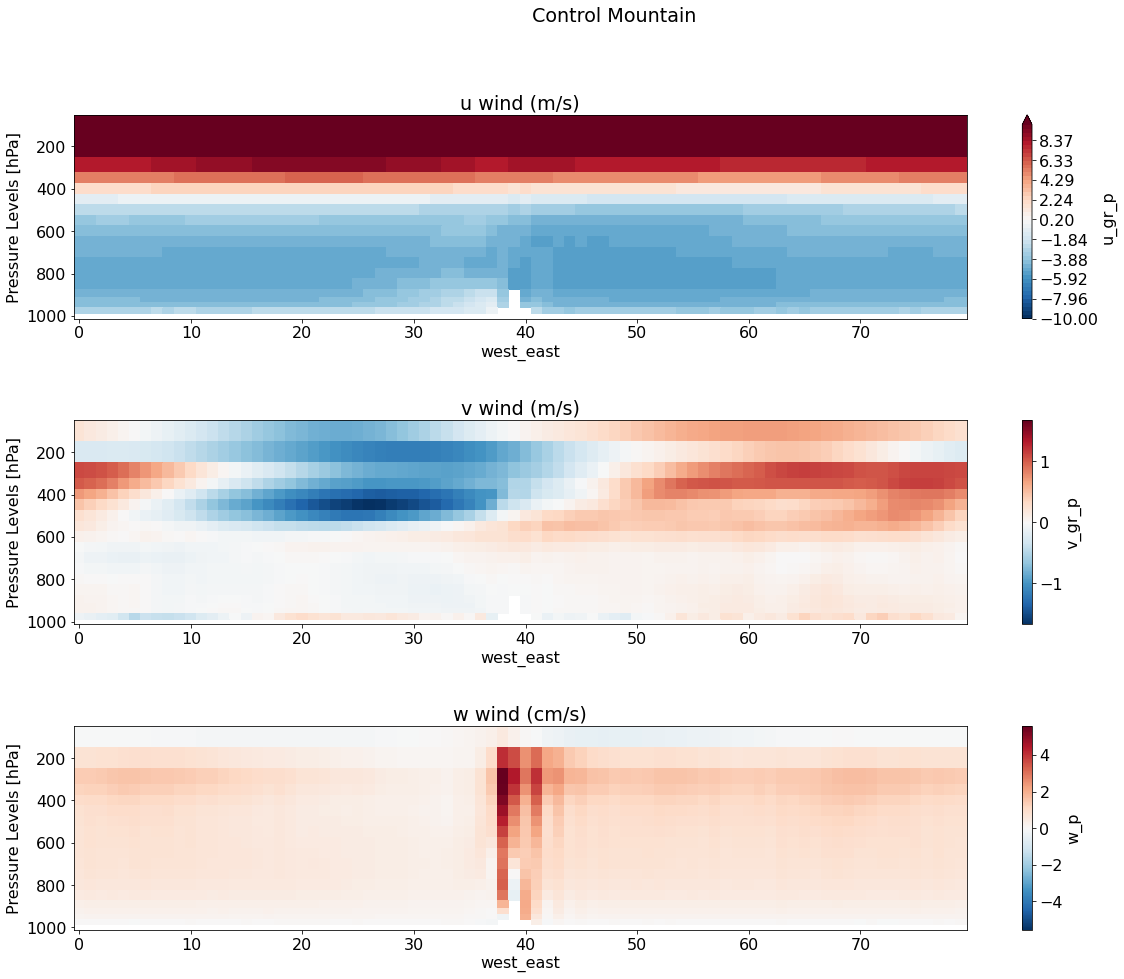

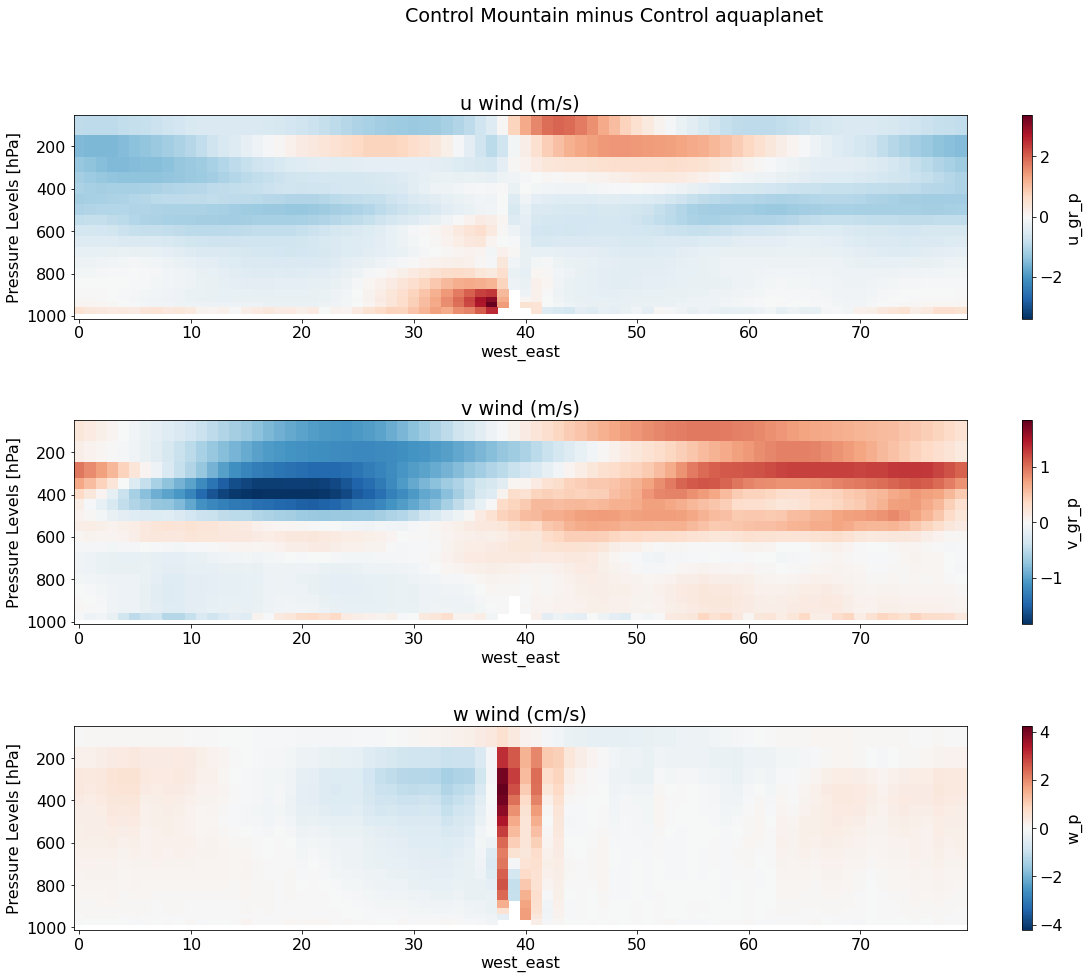

In [22]:
 
fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(McontU_alllevs,0.,ax[0],"u wind (m/s)",np.linspace(-10.,10.))
plot_lon_lev(McontV_alllevs,0.,ax[1],"v wind (m/s)")
plot_lon_lev(100*McontW_alllevs,0.,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain");None

#era5mf.plot(ax=ax[i][0], x='month',yincrease=False,cbar_kwargs={"label":"Mass flux (kg/m2/s)","ticks":np.arange(-lvls[i][1],lvls[i][1]+1e-6,lvls[i][2])},cmap=plt.cm.RdBu_r,levels=np.linspace(-lvls[i][0],lvls[i][0]))



fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(McontU_alllevs,AcontU_alllevs,ax[0],"u wind (m/s)")
plot_lon_lev(McontV_alllevs,AcontV_alllevs,ax[1],"v wind (m/s)")
plot_lon_lev(100*McontW_alllevs,100*AcontW_alllevs,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain minus Control aquaplanet");None

## Hadley circulation

In [24]:
%%time
McontU_alllevs_alllats = Mcont.vars.u_gr_p.isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean("time").compute()
McontV_alllevs_alllats = Mcont.vars.v_gr_p.isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean("time").compute()
McontW_alllevs_alllats = Mcont.vars.w_p.isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean("time").compute()
AcontU_alllevs_alllats = Acont.vars.u_gr_p.isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean("time").compute()
AcontV_alllevs_alllats = Acont.vars.v_gr_p.isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean("time").compute()
AcontW_alllevs_alllats = Acont.vars.w_p.isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean("time").compute()



/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-pack

CPU times: user 23.1 s, sys: 28.2 s, total: 51.4 s
Wall time: 17.1 s


In [14]:
McontU_std = McontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontV_std = McontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontW_std = McontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontU_std = AcontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontV_std = AcontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontW_std = AcontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')


In [59]:
%%time 
McontU_lonmean_std = Mcont.vars.u_gr_p.isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean("west_east").fillna(0.).rolling(time=400, center=True).mean().dropna("time").std('time').compute()
McontV_lonmean_std = Mcont.vars.v_gr_p.isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean("west_east").fillna(0.).rolling(time=400, center=True).mean().dropna("time").std('time').compute()
McontW_lonmean_std = Mcont.vars.w_p.isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean("west_east").fillna(0.).rolling(time=400, center=True).mean().dropna("time").std('time').compute()
AcontU_lonmean_std = Acont.vars.u_gr_p.isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean("west_east").fillna(0.).rolling(time=400, center=True).mean().dropna("time").std('time').compute()
AcontV_lonmean_std = Acont.vars.v_gr_p.isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean("west_east").fillna(0.).rolling(time=400, center=True).mean().dropna("time").std('time').compute()
AcontW_lonmean_std = Acont.vars.w_p.isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean("west_east").fillna(0.).rolling(time=400, center=True).mean().dropna("time").std('time').compute()



/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-pack

CPU times: user 1min 54s, sys: 1min 49s, total: 3min 43s
Wall time: 55 s


In [60]:
def plot_lat_lev_diff(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax, x='south_north',yincrease=False)
    else :
        (Mcont-Acont).plot(ax=ax, x='south_north',yincrease=False,levels=lvls)
    ax.set_title(lbl)

    

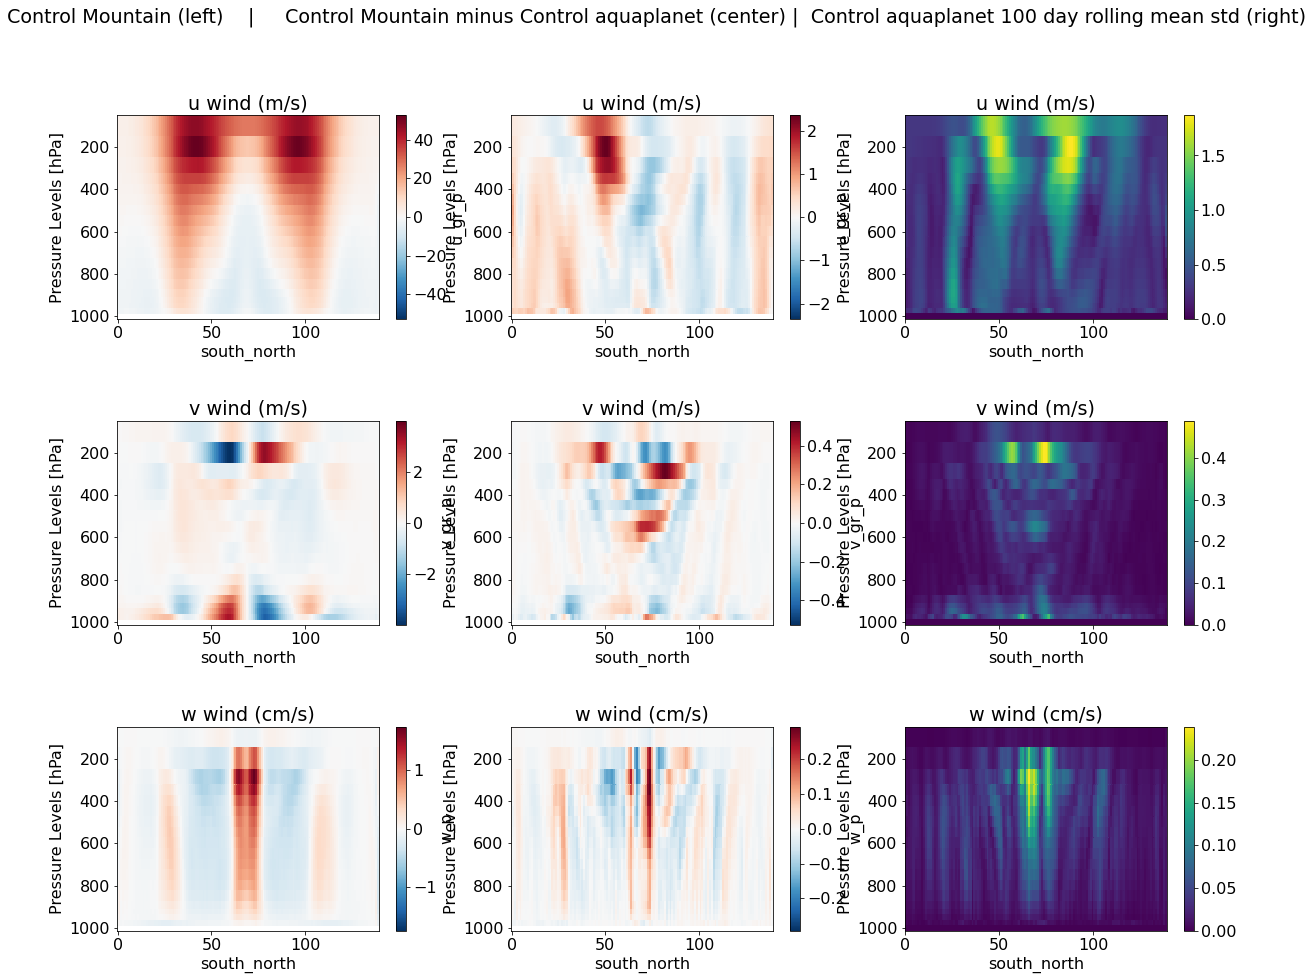

In [64]:
fig, ax = plt.subplots(3,3,figsize=(20,15))
plot_lat_lev_diff(McontU_alllevs_alllats.mean("west_east"),0.,ax[0][0],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev_diff(McontV_alllevs_alllats.mean("west_east"),0.,ax[1][0],"v wind (m/s)")
plot_lat_lev_diff(100*McontW_alllevs_alllats.mean("west_east"),0.,ax[2][0],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lev_diff(McontU_alllevs_alllats.mean("west_east"),AcontU_alllevs_alllats.mean("west_east"),ax[0][1],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev_diff(McontV_alllevs_alllats.mean("west_east"),AcontV_alllevs_alllats.mean("west_east"),ax[1][1],"v wind (m/s)")
plot_lat_lev_diff(100*McontW_alllevs_alllats.mean("west_east"),100*AcontW_alllevs_alllats.mean("west_east"),ax[2][1],"w wind (cm/s)")

plot_lat_lev_diff(AcontU_lonmean_std,0.,ax[0][2],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev_diff(AcontV_lonmean_std,0.,ax[1][2],"v wind (m/s)")
plot_lat_lev_diff(100*AcontW_lonmean_std,0.,ax[2][2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)    |     Control Mountain minus Control aquaplanet (center) |  Control aquaplanet 100 day rolling mean std (right)");None

In [65]:
def plot_lat_lon(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax)
    else :
        (Mcont-Acont).plot(ax=ax,levels=lvls)
    ax.set_title(lbl)
  

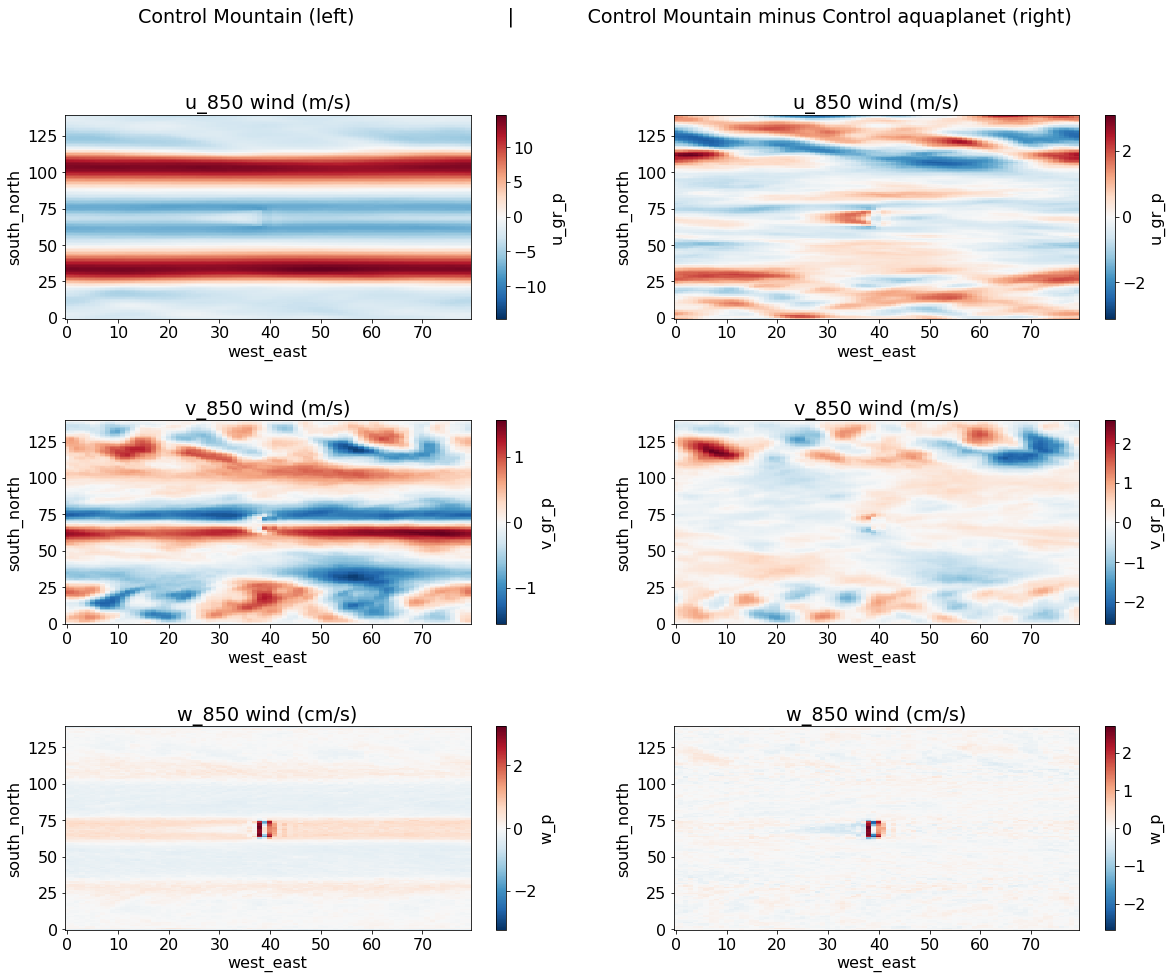

In [66]:
  
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=850.),0.,    ax[0][0],"u_850 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=850.),0.,    ax[1][0],"v_850 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=850.),0.,ax[2][0],"w_850 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=850.),AcontU_alllevs_alllats.sel(level=850.),        ax[0][1],"u_850 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=850.),AcontV_alllevs_alllats.sel(level=850.),        ax[1][1],"v_850 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=850.),100*AcontW_alllevs_alllats.sel(level=850.),ax[2][1],"w_850 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None

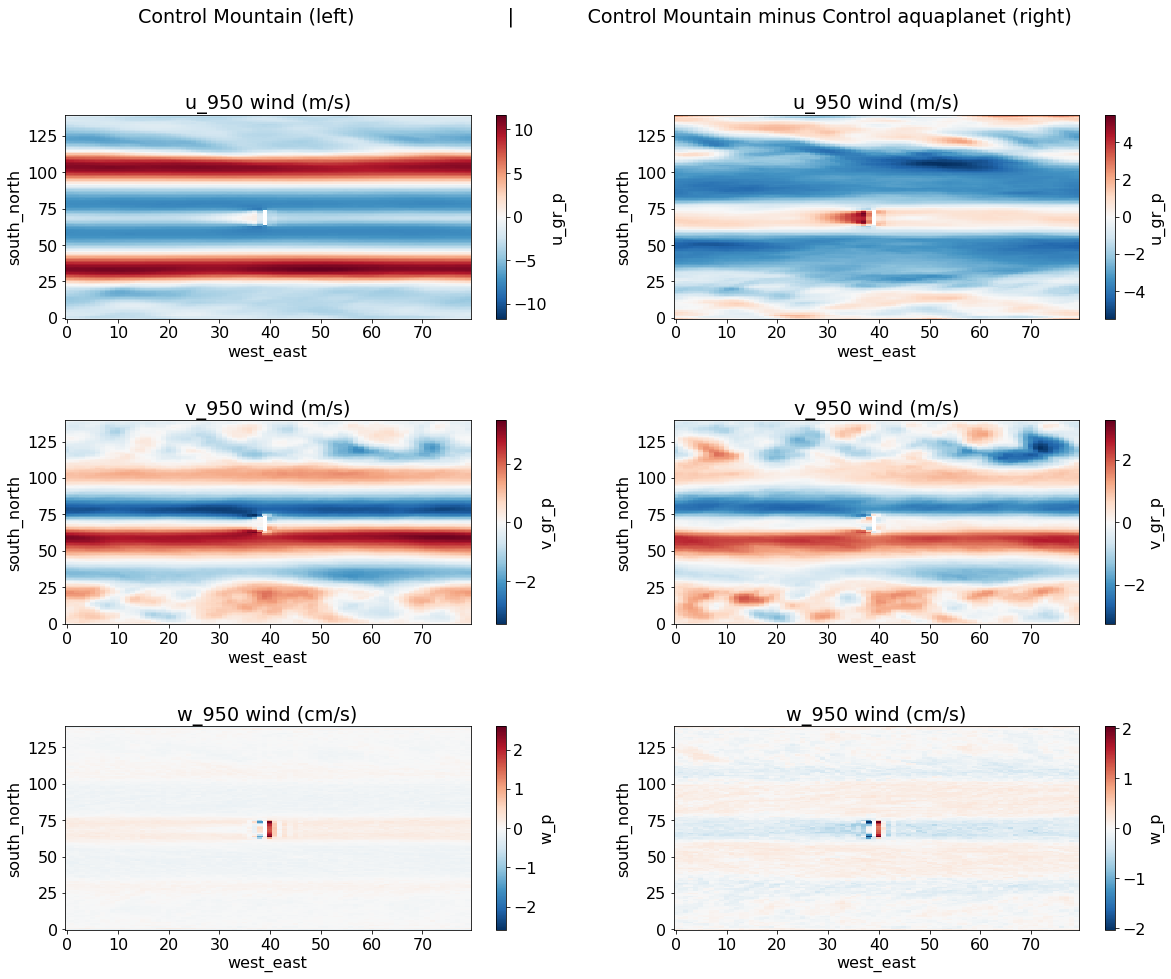

In [69]:
  
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=950.),0.,    ax[0][0],"u_950 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=950.),0.,    ax[1][0],"v_950 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=950.),0.,ax[2][0],"w_950 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=950.),AcontU_alllevs_alllats.sel(level=850.),        ax[0][1],"u_950 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=950.),AcontV_alllevs_alllats.sel(level=850.),        ax[1][1],"v_950 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=950.),100*AcontW_alllevs_alllats.sel(level=850.),ax[2][1],"w_950 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None

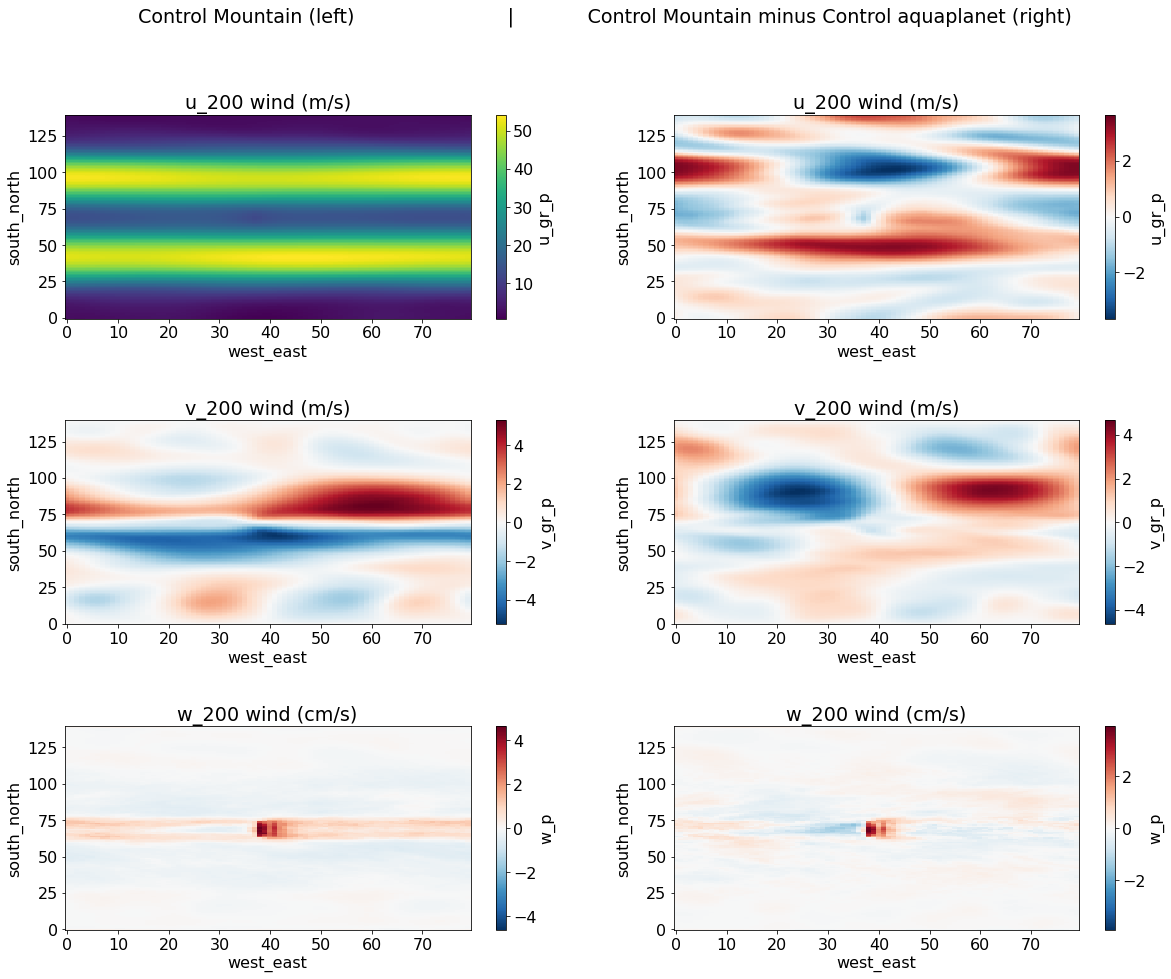

In [67]:
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=200.),0.,    ax[0][0],"u_200 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=200.),0.,    ax[1][0],"v_200 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=200.),0.,ax[2][0],"w_200 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=200.),AcontU_alllevs_alllats.sel(level=200.),        ax[0][1],"u_200 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=200.),AcontV_alllevs_alllats.sel(level=200.),        ax[1][1],"v_200 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=200.),100*AcontW_alllevs_alllats.sel(level=200.),ax[2][1],"w_200 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None
